In [18]:
import json
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

try:
    import requests
except ModuleNotFoundError:
    import micropip
    micropip.install("requests")
    import requests


In [19]:
# API Endpoints
CURRENT_QUIZ_URL = "https://api.jsonserve.com/rJvd7g"
HISTORICAL_QUIZ_URL = "https://api.jsonserve.com/XgAgFJ"

In [20]:
# Fetch Data
def fetch_data(url):
    try:
        response = requests.get(url, timeout=5)
        response.raise_for_status()
        return response.json()
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

In [21]:
# Load Data
current_quiz_data = fetch_data(CURRENT_QUIZ_URL) or {}
historical_quiz_data = fetch_data(HISTORICAL_QUIZ_URL) or []

In [22]:
# Analyze Performance
def analyze_performance(current, history):
    performance = {}
    
    for quiz in history:
        if not isinstance(quiz, dict) or 'response_map' not in quiz or 'correct_answers' not in quiz:
            continue
        
        correct_answers = quiz['correct_answers'] if isinstance(quiz['correct_answers'], dict) else {}
        
        for q_id, selected_option in quiz['response_map'].items():
            if q_id not in performance:
                performance[q_id] = {'attempts': 0, 'correct': 0}
            performance[q_id]['attempts'] += 1
            if correct_answers.get(q_id) == selected_option:
                performance[q_id]['correct'] += 1
    
    return performance


In [23]:
# Generate Insights
def generate_insights(performance):
    insights = []
    for q_id, stats in performance.items():
        accuracy = stats['correct'] / stats['attempts'] if stats['attempts'] > 0 else 0
        if accuracy < 0.5:
            insights.append(f"Focus more on question {q_id} - Low accuracy: {accuracy:.2f}")
    return insights


In [24]:
# Generate Recommendations
def generate_recommendations(insights):
    recommendations = []
    for insight in insights:
        recommendations.append(f"Revise concepts related to {insight.split('-')[0].strip()}")
    return recommendations

In [25]:
# Define Student Persona
def define_student_persona(performance):
    strengths = []
    weaknesses = []
    
    for q_id, stats in performance.items():
        accuracy = stats['correct'] / stats['attempts'] if stats['attempts'] > 0 else 0
        if accuracy > 0.8:
            strengths.append(q_id)
        elif accuracy < 0.5:
            weaknesses.append(q_id)
    
    persona = {
        "Strong Performer" if len(strengths) > len(weaknesses) else "Needs Improvement": {
            "Strengths": strengths,
            "Weaknesses": weaknesses
        }
    }
    
    return persona


In [26]:
# Predict NEET Rank
def predict_neet_rank(performance):
    total_questions = sum(stats['attempts'] for stats in performance.values())
    correct_answers = sum(stats['correct'] for stats in performance.values())
    accuracy = correct_answers / total_questions if total_questions > 0 else 0
    
    mean_neet_score = 600  # Hypothetical average NEET score
    std_dev = 50  # Hypothetical standard deviation
    predicted_score = mean_neet_score * accuracy
    
    rank_estimate = stats.norm.sf(predicted_score, mean_neet_score, std_dev) * 1000000  # Approximate rank
    
    return max(1, int(rank_estimate))

Insights:
Focus more on question 2523 - Low accuracy: 0.00
Focus more on question 2529 - Low accuracy: 0.00
Focus more on question 2533 - Low accuracy: 0.00
Focus more on question 2534 - Low accuracy: 0.00
Focus more on question 2535 - Low accuracy: 0.00
Focus more on question 2537 - Low accuracy: 0.00
Focus more on question 2538 - Low accuracy: 0.00
Focus more on question 2541 - Low accuracy: 0.00
Focus more on question 2543 - Low accuracy: 0.00
Focus more on question 2550 - Low accuracy: 0.00
Focus more on question 2553 - Low accuracy: 0.00
Focus more on question 2554 - Low accuracy: 0.00
Focus more on question 2555 - Low accuracy: 0.00
Focus more on question 2557 - Low accuracy: 0.00
Focus more on question 2558 - Low accuracy: 0.00
Focus more on question 2564 - Low accuracy: 0.00
Focus more on question 2565 - Low accuracy: 0.00
Focus more on question 2567 - Low accuracy: 0.00
Focus more on question 2572 - Low accuracy: 0.00
Focus more on question 2576 - Low accuracy: 0.00
Focus more

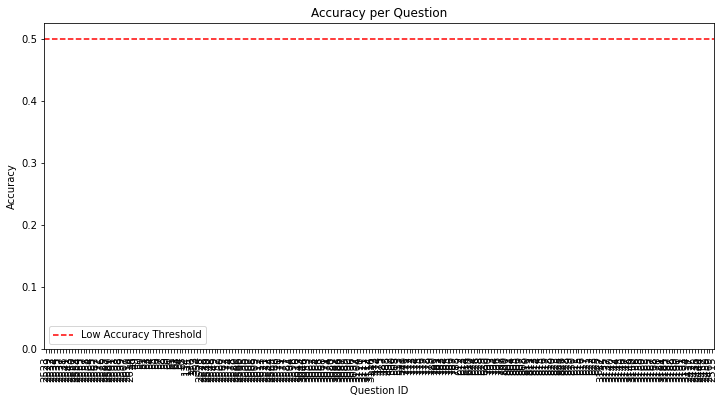

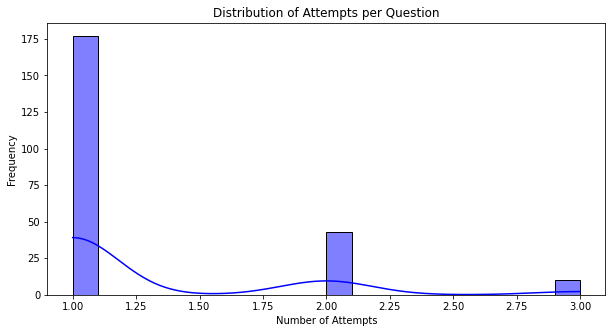

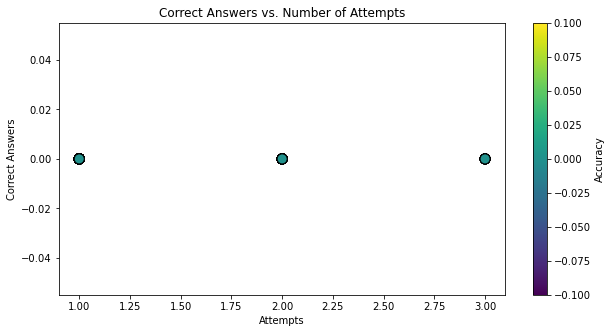

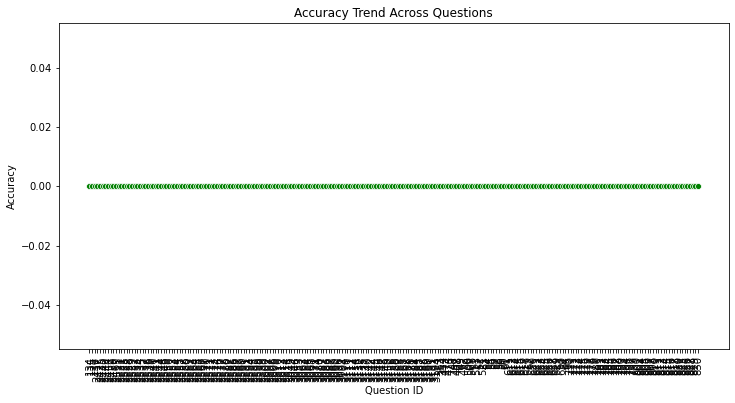

In [27]:
# Visualization Functions
def visualize_performance(performance):
    df = pd.DataFrame([{**{'question_id': q_id}, **stats} for q_id, stats in performance.items()])
    df['accuracy'] = df['correct'] / df['attempts']
    
    # Bar Plot: Accuracy per Question
    plt.figure(figsize=(12, 6))
    sns.barplot(x='question_id', y='accuracy', data=df, palette='coolwarm')
    plt.axhline(0.5, linestyle='--', color='red', label='Low Accuracy Threshold')
    plt.xlabel("Question ID")
    plt.ylabel("Accuracy")
    plt.title("Accuracy per Question")
    plt.legend()
    plt.xticks(rotation=90)
    plt.show()
     # Histogram: Attempt Distribution
    plt.figure(figsize=(10, 5))
    sns.histplot(df['attempts'], bins=20, kde=True, color='blue')
    plt.xlabel("Number of Attempts")
    plt.ylabel("Frequency")
    plt.title("Distribution of Attempts per Question")
    plt.show()
     # Scatter Plot: Correct vs Attempts with Colorbar Fix
    plt.figure(figsize=(10, 5))
    scatter = plt.scatter(df['attempts'], df['correct'], c=df['accuracy'], cmap='viridis', s=100, edgecolors='black')
    plt.colorbar(scatter, label="Accuracy")
    plt.xlabel("Attempts")
    plt.ylabel("Correct Answers")
    plt.title("Correct Answers vs. Number of Attempts")
    plt.show()
    # Line Plot: Accuracy Trend
    df = df.sort_values(by='question_id')
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='question_id', y='accuracy', data=df, marker='o', color='green')
    plt.xlabel("Question ID")
    plt.ylabel("Accuracy")
    plt.title("Accuracy Trend Across Questions")
    plt.xticks(rotation=90)
    plt.show()
    # Execute Analysis
if current_quiz_data and historical_quiz_data:
    performance = analyze_performance(current_quiz_data, historical_quiz_data)
    insights = generate_insights(performance)
    recommendations = generate_recommendations(insights)
    persona = define_student_persona(performance)
    predicted_rank = predict_neet_rank(performance)
     # Display Results
    print("Insights:")
    print("\n".join(insights) if insights else "No insights available.")
    print("\nRecommendations:")
    print("\n".join(recommendations) if recommendations else "No recommendations available.")
    print("\nStudent Persona:")
    print(json.dumps(persona, indent=4))
    print("\nPredicted NEET Rank:", predicted_rank)
    
    # Show Visualizations
    visualize_performance(performance)
else:
    print("Data could not be loaded. Please check API connectivity.")